# 1. Import Dependencies and Data

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  Using cached tensorflow-2.9.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Using cached tensorflow_gpu-2.9.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Using cached matplotlib-3.5.2-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.8 MB/s eta 0:00:000:00:010:00:01:01
  Using cached ipywidgets-7.7.1-py2.py3-none-any.whl (123 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-3.19.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-manylinux_2_

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.8/167.8 kB 8.9 MB/s eta 0:00:00
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Using cached notebook-6.4.12-py3-none-any.whl (9.9 MB)
  Using cached zipp-3.8.1-py3-none-any.whl (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 9.4 MB/s eta 0:00:00
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached importlib_metadata-4.12.0-py3-none-any.whl (21 kB)
  Using cached argon2_cffi-21.3.0-py3-none-any.whl (14 kB)
  Using cached prometheus_client-0.14.1-py3-none-any.whl (59 kB)
  Using cached nbconvert-6.5.0-py3-none-any.whl (561 kB)
  Using cached Send2Trash-1.8.0-py3-none-any.whl (18 kB)
  Using cached Jinja2-3.1.2-py3-none-any.w

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.1.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        21.4.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.0
certifi                      2022.6.15
cffi                         1.15.1
charset-normalizer           2.1.0
cycler                       0.11.0
debugpy                      1.6.2
decorator                    5.1.1
defusedxml                   0.7.1
dill                         0.3.5.1
entrypoints                  0.4
etils                        0.6.0
executing                    0.8.3
fastjsonschema               2.15.3
flatbuffers                  1.12
fonttools                    4.34.4
gast                         0.4.0
google-auth                  2.9.1
g

In [1]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt
# http://vis-www.cs.umass.edu/lfw/

In [3]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

tar: lfw.tgz: open할 수 없습니다: 그런 파일이나 디렉터리가 없습니다
tar: Error is not recoverable: exiting now


In [3]:
import os
# Setup paths
POS_PATH = os.path.join('data', 'face')

In [5]:
# Make the directories
os.makedirs(POS_PATH)

FileExistsError: [Errno 17] File exists: 'data/face'

In [ ]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(POS_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

# Load and Preprocess Images

In [4]:
ds= tf.data.Dataset.list_files(os.path.join(POS_PATH, '*.jpg')).take(len(os.listdir(POS_PATH)))

2022-07-15 15:25:53.542758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-15 15:25:54.119633: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9447 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [5]:
ds.as_numpy_iterator().next() ## as_numpy_iterator: Tensorflow 데이터셋의 window method

b'data/face/Renee_Zellweger_0015.jpg'

In [6]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [7]:
img = preprocess('data/face/Joan_Laporta_0007.jpg')
img.numpy().max()

1.0

# 2. Viz Data and Build Dataset

In [8]:
# Do some data transformation
import numpy as np

In [9]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

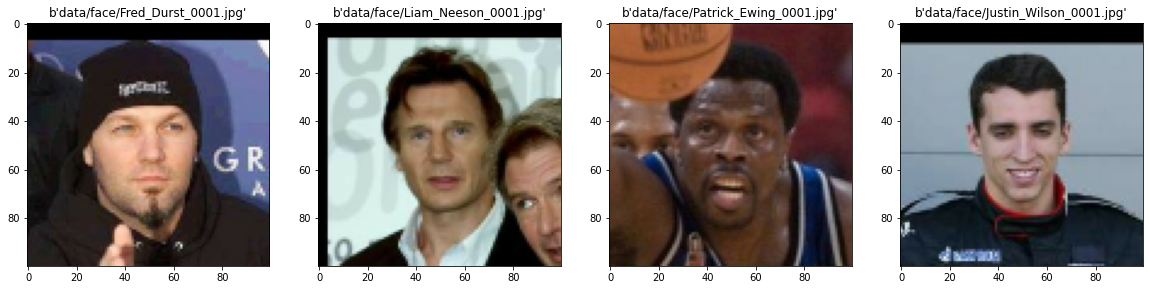

In [10]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(preprocess(sample)))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample)

# Building TF Dataset

In [13]:
image_3= []
for i in range(len(os.listdir(POS_PATH))):
    image_1= preprocess(os.path.join(POS_PATH, os.listdir(POS_PATH)[i]))
    image_3.append(image_1)
    print(i, "번째 텐서 스택킹 완료했습니다!")

0 번째 텐서 스택킹 완료했습니다!
1 번째 텐서 스택킹 완료했습니다!
2 번째 텐서 스택킹 완료했습니다!
3 번째 텐서 스택킹 완료했습니다!
4 번째 텐서 스택킹 완료했습니다!
5 번째 텐서 스택킹 완료했습니다!
6 번째 텐서 스택킹 완료했습니다!
7 번째 텐서 스택킹 완료했습니다!
8 번째 텐서 스택킹 완료했습니다!
9 번째 텐서 스택킹 완료했습니다!
10 번째 텐서 스택킹 완료했습니다!
11 번째 텐서 스택킹 완료했습니다!
12 번째 텐서 스택킹 완료했습니다!
13 번째 텐서 스택킹 완료했습니다!
14 번째 텐서 스택킹 완료했습니다!
15 번째 텐서 스택킹 완료했습니다!
16 번째 텐서 스택킹 완료했습니다!
17 번째 텐서 스택킹 완료했습니다!
18 번째 텐서 스택킹 완료했습니다!
19 번째 텐서 스택킹 완료했습니다!
20 번째 텐서 스택킹 완료했습니다!
21 번째 텐서 스택킹 완료했습니다!
22 번째 텐서 스택킹 완료했습니다!
23 번째 텐서 스택킹 완료했습니다!
24 번째 텐서 스택킹 완료했습니다!
25 번째 텐서 스택킹 완료했습니다!
26 번째 텐서 스택킹 완료했습니다!
27 번째 텐서 스택킹 완료했습니다!
28 번째 텐서 스택킹 완료했습니다!
29 번째 텐서 스택킹 완료했습니다!
30 번째 텐서 스택킹 완료했습니다!
31 번째 텐서 스택킹 완료했습니다!
32 번째 텐서 스택킹 완료했습니다!
33 번째 텐서 스택킹 완료했습니다!
34 번째 텐서 스택킹 완료했습니다!
35 번째 텐서 스택킹 완료했습니다!
36 번째 텐서 스택킹 완료했습니다!
37 번째 텐서 스택킹 완료했습니다!
38 번째 텐서 스택킹 완료했습니다!
39 번째 텐서 스택킹 완료했습니다!
40 번째 텐서 스택킹 완료했습니다!
41 번째 텐서 스택킹 완료했습니다!
42 번째 텐서 스택킹 완료했습니다!
43 번째 텐서 스택킹 완료했습니다!
44 번째 텐서 스택킹 완료했습니다!
45 번째 텐서 스택킹 완료했습니다!
46 번째 텐서 스택킹 완료했습니다!
47 번째 텐서 스택킹 완료했습니다!
48

378 번째 텐서 스택킹 완료했습니다!
379 번째 텐서 스택킹 완료했습니다!
380 번째 텐서 스택킹 완료했습니다!
381 번째 텐서 스택킹 완료했습니다!
382 번째 텐서 스택킹 완료했습니다!
383 번째 텐서 스택킹 완료했습니다!
384 번째 텐서 스택킹 완료했습니다!
385 번째 텐서 스택킹 완료했습니다!
386 번째 텐서 스택킹 완료했습니다!
387 번째 텐서 스택킹 완료했습니다!
388 번째 텐서 스택킹 완료했습니다!
389 번째 텐서 스택킹 완료했습니다!
390 번째 텐서 스택킹 완료했습니다!
391 번째 텐서 스택킹 완료했습니다!
392 번째 텐서 스택킹 완료했습니다!
393 번째 텐서 스택킹 완료했습니다!
394 번째 텐서 스택킹 완료했습니다!
395 번째 텐서 스택킹 완료했습니다!
396 번째 텐서 스택킹 완료했습니다!
397 번째 텐서 스택킹 완료했습니다!
398 번째 텐서 스택킹 완료했습니다!
399 번째 텐서 스택킹 완료했습니다!
400 번째 텐서 스택킹 완료했습니다!
401 번째 텐서 스택킹 완료했습니다!
402 번째 텐서 스택킹 완료했습니다!
403 번째 텐서 스택킹 완료했습니다!
404 번째 텐서 스택킹 완료했습니다!
405 번째 텐서 스택킹 완료했습니다!
406 번째 텐서 스택킹 완료했습니다!
407 번째 텐서 스택킹 완료했습니다!
408 번째 텐서 스택킹 완료했습니다!
409 번째 텐서 스택킹 완료했습니다!
410 번째 텐서 스택킹 완료했습니다!
411 번째 텐서 스택킹 완료했습니다!
412 번째 텐서 스택킹 완료했습니다!
413 번째 텐서 스택킹 완료했습니다!
414 번째 텐서 스택킹 완료했습니다!
415 번째 텐서 스택킹 완료했습니다!
416 번째 텐서 스택킹 완료했습니다!
417 번째 텐서 스택킹 완료했습니다!
418 번째 텐서 스택킹 완료했습니다!
419 번째 텐서 스택킹 완료했습니다!
420 번째 텐서 스택킹 완료했습니다!
421 번째 텐서 스택킹 완료했습니다!
422 번째 텐서 스택킹 완료했습니다!
423 번째 텐서 

763 번째 텐서 스택킹 완료했습니다!
764 번째 텐서 스택킹 완료했습니다!
765 번째 텐서 스택킹 완료했습니다!
766 번째 텐서 스택킹 완료했습니다!
767 번째 텐서 스택킹 완료했습니다!
768 번째 텐서 스택킹 완료했습니다!
769 번째 텐서 스택킹 완료했습니다!
770 번째 텐서 스택킹 완료했습니다!
771 번째 텐서 스택킹 완료했습니다!
772 번째 텐서 스택킹 완료했습니다!
773 번째 텐서 스택킹 완료했습니다!
774 번째 텐서 스택킹 완료했습니다!
775 번째 텐서 스택킹 완료했습니다!
776 번째 텐서 스택킹 완료했습니다!
777 번째 텐서 스택킹 완료했습니다!
778 번째 텐서 스택킹 완료했습니다!
779 번째 텐서 스택킹 완료했습니다!
780 번째 텐서 스택킹 완료했습니다!
781 번째 텐서 스택킹 완료했습니다!
782 번째 텐서 스택킹 완료했습니다!
783 번째 텐서 스택킹 완료했습니다!
784 번째 텐서 스택킹 완료했습니다!
785 번째 텐서 스택킹 완료했습니다!
786 번째 텐서 스택킹 완료했습니다!
787 번째 텐서 스택킹 완료했습니다!
788 번째 텐서 스택킹 완료했습니다!
789 번째 텐서 스택킹 완료했습니다!
790 번째 텐서 스택킹 완료했습니다!
791 번째 텐서 스택킹 완료했습니다!
792 번째 텐서 스택킹 완료했습니다!
793 번째 텐서 스택킹 완료했습니다!
794 번째 텐서 스택킹 완료했습니다!
795 번째 텐서 스택킹 완료했습니다!
796 번째 텐서 스택킹 완료했습니다!
797 번째 텐서 스택킹 완료했습니다!
798 번째 텐서 스택킹 완료했습니다!
799 번째 텐서 스택킹 완료했습니다!
800 번째 텐서 스택킹 완료했습니다!
801 번째 텐서 스택킹 완료했습니다!
802 번째 텐서 스택킹 완료했습니다!
803 번째 텐서 스택킹 완료했습니다!
804 번째 텐서 스택킹 완료했습니다!
805 번째 텐서 스택킹 완료했습니다!
806 번째 텐서 스택킹 완료했습니다!
807 번째 텐서 스택킹 완료했습니다!
808 번째 텐서 

1140 번째 텐서 스택킹 완료했습니다!
1141 번째 텐서 스택킹 완료했습니다!
1142 번째 텐서 스택킹 완료했습니다!
1143 번째 텐서 스택킹 완료했습니다!
1144 번째 텐서 스택킹 완료했습니다!
1145 번째 텐서 스택킹 완료했습니다!
1146 번째 텐서 스택킹 완료했습니다!
1147 번째 텐서 스택킹 완료했습니다!
1148 번째 텐서 스택킹 완료했습니다!
1149 번째 텐서 스택킹 완료했습니다!
1150 번째 텐서 스택킹 완료했습니다!
1151 번째 텐서 스택킹 완료했습니다!
1152 번째 텐서 스택킹 완료했습니다!
1153 번째 텐서 스택킹 완료했습니다!
1154 번째 텐서 스택킹 완료했습니다!
1155 번째 텐서 스택킹 완료했습니다!
1156 번째 텐서 스택킹 완료했습니다!
1157 번째 텐서 스택킹 완료했습니다!
1158 번째 텐서 스택킹 완료했습니다!
1159 번째 텐서 스택킹 완료했습니다!
1160 번째 텐서 스택킹 완료했습니다!
1161 번째 텐서 스택킹 완료했습니다!
1162 번째 텐서 스택킹 완료했습니다!
1163 번째 텐서 스택킹 완료했습니다!
1164 번째 텐서 스택킹 완료했습니다!
1165 번째 텐서 스택킹 완료했습니다!
1166 번째 텐서 스택킹 완료했습니다!
1167 번째 텐서 스택킹 완료했습니다!
1168 번째 텐서 스택킹 완료했습니다!
1169 번째 텐서 스택킹 완료했습니다!
1170 번째 텐서 스택킹 완료했습니다!
1171 번째 텐서 스택킹 완료했습니다!
1172 번째 텐서 스택킹 완료했습니다!
1173 번째 텐서 스택킹 완료했습니다!
1174 번째 텐서 스택킹 완료했습니다!
1175 번째 텐서 스택킹 완료했습니다!
1176 번째 텐서 스택킹 완료했습니다!
1177 번째 텐서 스택킹 완료했습니다!
1178 번째 텐서 스택킹 완료했습니다!
1179 번째 텐서 스택킹 완료했습니다!
1180 번째 텐서 스택킹 완료했습니다!
1181 번째 텐서 스택킹 완료했습니다!
1182 번째 텐서 스택킹 완료했습니다!
1183 번째 텐서 

1515 번째 텐서 스택킹 완료했습니다!
1516 번째 텐서 스택킹 완료했습니다!
1517 번째 텐서 스택킹 완료했습니다!
1518 번째 텐서 스택킹 완료했습니다!
1519 번째 텐서 스택킹 완료했습니다!
1520 번째 텐서 스택킹 완료했습니다!
1521 번째 텐서 스택킹 완료했습니다!
1522 번째 텐서 스택킹 완료했습니다!
1523 번째 텐서 스택킹 완료했습니다!
1524 번째 텐서 스택킹 완료했습니다!
1525 번째 텐서 스택킹 완료했습니다!
1526 번째 텐서 스택킹 완료했습니다!
1527 번째 텐서 스택킹 완료했습니다!
1528 번째 텐서 스택킹 완료했습니다!
1529 번째 텐서 스택킹 완료했습니다!
1530 번째 텐서 스택킹 완료했습니다!
1531 번째 텐서 스택킹 완료했습니다!
1532 번째 텐서 스택킹 완료했습니다!
1533 번째 텐서 스택킹 완료했습니다!
1534 번째 텐서 스택킹 완료했습니다!
1535 번째 텐서 스택킹 완료했습니다!
1536 번째 텐서 스택킹 완료했습니다!
1537 번째 텐서 스택킹 완료했습니다!
1538 번째 텐서 스택킹 완료했습니다!
1539 번째 텐서 스택킹 완료했습니다!
1540 번째 텐서 스택킹 완료했습니다!
1541 번째 텐서 스택킹 완료했습니다!
1542 번째 텐서 스택킹 완료했습니다!
1543 번째 텐서 스택킹 완료했습니다!
1544 번째 텐서 스택킹 완료했습니다!
1545 번째 텐서 스택킹 완료했습니다!
1546 번째 텐서 스택킹 완료했습니다!
1547 번째 텐서 스택킹 완료했습니다!
1548 번째 텐서 스택킹 완료했습니다!
1549 번째 텐서 스택킹 완료했습니다!
1550 번째 텐서 스택킹 완료했습니다!
1551 번째 텐서 스택킹 완료했습니다!
1552 번째 텐서 스택킹 완료했습니다!
1553 번째 텐서 스택킹 완료했습니다!
1554 번째 텐서 스택킹 완료했습니다!
1555 번째 텐서 스택킹 완료했습니다!
1556 번째 텐서 스택킹 완료했습니다!
1557 번째 텐서 스택킹 완료했습니다!
1558 번째 텐서 

1877 번째 텐서 스택킹 완료했습니다!
1878 번째 텐서 스택킹 완료했습니다!
1879 번째 텐서 스택킹 완료했습니다!
1880 번째 텐서 스택킹 완료했습니다!
1881 번째 텐서 스택킹 완료했습니다!
1882 번째 텐서 스택킹 완료했습니다!
1883 번째 텐서 스택킹 완료했습니다!
1884 번째 텐서 스택킹 완료했습니다!
1885 번째 텐서 스택킹 완료했습니다!
1886 번째 텐서 스택킹 완료했습니다!
1887 번째 텐서 스택킹 완료했습니다!
1888 번째 텐서 스택킹 완료했습니다!
1889 번째 텐서 스택킹 완료했습니다!
1890 번째 텐서 스택킹 완료했습니다!
1891 번째 텐서 스택킹 완료했습니다!
1892 번째 텐서 스택킹 완료했습니다!
1893 번째 텐서 스택킹 완료했습니다!
1894 번째 텐서 스택킹 완료했습니다!
1895 번째 텐서 스택킹 완료했습니다!
1896 번째 텐서 스택킹 완료했습니다!
1897 번째 텐서 스택킹 완료했습니다!
1898 번째 텐서 스택킹 완료했습니다!
1899 번째 텐서 스택킹 완료했습니다!
1900 번째 텐서 스택킹 완료했습니다!
1901 번째 텐서 스택킹 완료했습니다!
1902 번째 텐서 스택킹 완료했습니다!
1903 번째 텐서 스택킹 완료했습니다!
1904 번째 텐서 스택킹 완료했습니다!
1905 번째 텐서 스택킹 완료했습니다!
1906 번째 텐서 스택킹 완료했습니다!
1907 번째 텐서 스택킹 완료했습니다!
1908 번째 텐서 스택킹 완료했습니다!
1909 번째 텐서 스택킹 완료했습니다!
1910 번째 텐서 스택킹 완료했습니다!
1911 번째 텐서 스택킹 완료했습니다!
1912 번째 텐서 스택킹 완료했습니다!
1913 번째 텐서 스택킹 완료했습니다!
1914 번째 텐서 스택킹 완료했습니다!
1915 번째 텐서 스택킹 완료했습니다!
1916 번째 텐서 스택킹 완료했습니다!
1917 번째 텐서 스택킹 완료했습니다!
1918 번째 텐서 스택킹 완료했습니다!
1919 번째 텐서 스택킹 완료했습니다!
1920 번째 텐서 

2254 번째 텐서 스택킹 완료했습니다!
2255 번째 텐서 스택킹 완료했습니다!
2256 번째 텐서 스택킹 완료했습니다!
2257 번째 텐서 스택킹 완료했습니다!
2258 번째 텐서 스택킹 완료했습니다!
2259 번째 텐서 스택킹 완료했습니다!
2260 번째 텐서 스택킹 완료했습니다!
2261 번째 텐서 스택킹 완료했습니다!
2262 번째 텐서 스택킹 완료했습니다!
2263 번째 텐서 스택킹 완료했습니다!
2264 번째 텐서 스택킹 완료했습니다!
2265 번째 텐서 스택킹 완료했습니다!
2266 번째 텐서 스택킹 완료했습니다!
2267 번째 텐서 스택킹 완료했습니다!
2268 번째 텐서 스택킹 완료했습니다!
2269 번째 텐서 스택킹 완료했습니다!
2270 번째 텐서 스택킹 완료했습니다!
2271 번째 텐서 스택킹 완료했습니다!
2272 번째 텐서 스택킹 완료했습니다!
2273 번째 텐서 스택킹 완료했습니다!
2274 번째 텐서 스택킹 완료했습니다!
2275 번째 텐서 스택킹 완료했습니다!
2276 번째 텐서 스택킹 완료했습니다!
2277 번째 텐서 스택킹 완료했습니다!
2278 번째 텐서 스택킹 완료했습니다!
2279 번째 텐서 스택킹 완료했습니다!
2280 번째 텐서 스택킹 완료했습니다!
2281 번째 텐서 스택킹 완료했습니다!
2282 번째 텐서 스택킹 완료했습니다!
2283 번째 텐서 스택킹 완료했습니다!
2284 번째 텐서 스택킹 완료했습니다!
2285 번째 텐서 스택킹 완료했습니다!
2286 번째 텐서 스택킹 완료했습니다!
2287 번째 텐서 스택킹 완료했습니다!
2288 번째 텐서 스택킹 완료했습니다!
2289 번째 텐서 스택킹 완료했습니다!
2290 번째 텐서 스택킹 완료했습니다!
2291 번째 텐서 스택킹 완료했습니다!
2292 번째 텐서 스택킹 완료했습니다!
2293 번째 텐서 스택킹 완료했습니다!
2294 번째 텐서 스택킹 완료했습니다!
2295 번째 텐서 스택킹 완료했습니다!
2296 번째 텐서 스택킹 완료했습니다!
2297 번째 텐서 

2638 번째 텐서 스택킹 완료했습니다!
2639 번째 텐서 스택킹 완료했습니다!
2640 번째 텐서 스택킹 완료했습니다!
2641 번째 텐서 스택킹 완료했습니다!
2642 번째 텐서 스택킹 완료했습니다!
2643 번째 텐서 스택킹 완료했습니다!
2644 번째 텐서 스택킹 완료했습니다!
2645 번째 텐서 스택킹 완료했습니다!
2646 번째 텐서 스택킹 완료했습니다!
2647 번째 텐서 스택킹 완료했습니다!
2648 번째 텐서 스택킹 완료했습니다!
2649 번째 텐서 스택킹 완료했습니다!
2650 번째 텐서 스택킹 완료했습니다!
2651 번째 텐서 스택킹 완료했습니다!
2652 번째 텐서 스택킹 완료했습니다!
2653 번째 텐서 스택킹 완료했습니다!
2654 번째 텐서 스택킹 완료했습니다!
2655 번째 텐서 스택킹 완료했습니다!
2656 번째 텐서 스택킹 완료했습니다!
2657 번째 텐서 스택킹 완료했습니다!
2658 번째 텐서 스택킹 완료했습니다!
2659 번째 텐서 스택킹 완료했습니다!
2660 번째 텐서 스택킹 완료했습니다!
2661 번째 텐서 스택킹 완료했습니다!
2662 번째 텐서 스택킹 완료했습니다!
2663 번째 텐서 스택킹 완료했습니다!
2664 번째 텐서 스택킹 완료했습니다!
2665 번째 텐서 스택킹 완료했습니다!
2666 번째 텐서 스택킹 완료했습니다!
2667 번째 텐서 스택킹 완료했습니다!
2668 번째 텐서 스택킹 완료했습니다!
2669 번째 텐서 스택킹 완료했습니다!
2670 번째 텐서 스택킹 완료했습니다!
2671 번째 텐서 스택킹 완료했습니다!
2672 번째 텐서 스택킹 완료했습니다!
2673 번째 텐서 스택킹 완료했습니다!
2674 번째 텐서 스택킹 완료했습니다!
2675 번째 텐서 스택킹 완료했습니다!
2676 번째 텐서 스택킹 완료했습니다!
2677 번째 텐서 스택킹 완료했습니다!
2678 번째 텐서 스택킹 완료했습니다!
2679 번째 텐서 스택킹 완료했습니다!
2680 번째 텐서 스택킹 완료했습니다!
2681 번째 텐서 

2999 번째 텐서 스택킹 완료했습니다!
3000 번째 텐서 스택킹 완료했습니다!
3001 번째 텐서 스택킹 완료했습니다!
3002 번째 텐서 스택킹 완료했습니다!
3003 번째 텐서 스택킹 완료했습니다!
3004 번째 텐서 스택킹 완료했습니다!
3005 번째 텐서 스택킹 완료했습니다!
3006 번째 텐서 스택킹 완료했습니다!
3007 번째 텐서 스택킹 완료했습니다!
3008 번째 텐서 스택킹 완료했습니다!
3009 번째 텐서 스택킹 완료했습니다!
3010 번째 텐서 스택킹 완료했습니다!
3011 번째 텐서 스택킹 완료했습니다!
3012 번째 텐서 스택킹 완료했습니다!
3013 번째 텐서 스택킹 완료했습니다!
3014 번째 텐서 스택킹 완료했습니다!
3015 번째 텐서 스택킹 완료했습니다!
3016 번째 텐서 스택킹 완료했습니다!
3017 번째 텐서 스택킹 완료했습니다!
3018 번째 텐서 스택킹 완료했습니다!
3019 번째 텐서 스택킹 완료했습니다!
3020 번째 텐서 스택킹 완료했습니다!
3021 번째 텐서 스택킹 완료했습니다!
3022 번째 텐서 스택킹 완료했습니다!
3023 번째 텐서 스택킹 완료했습니다!
3024 번째 텐서 스택킹 완료했습니다!
3025 번째 텐서 스택킹 완료했습니다!
3026 번째 텐서 스택킹 완료했습니다!
3027 번째 텐서 스택킹 완료했습니다!
3028 번째 텐서 스택킹 완료했습니다!
3029 번째 텐서 스택킹 완료했습니다!
3030 번째 텐서 스택킹 완료했습니다!
3031 번째 텐서 스택킹 완료했습니다!
3032 번째 텐서 스택킹 완료했습니다!
3033 번째 텐서 스택킹 완료했습니다!
3034 번째 텐서 스택킹 완료했습니다!
3035 번째 텐서 스택킹 완료했습니다!
3036 번째 텐서 스택킹 완료했습니다!
3037 번째 텐서 스택킹 완료했습니다!
3038 번째 텐서 스택킹 완료했습니다!
3039 번째 텐서 스택킹 완료했습니다!
3040 번째 텐서 스택킹 완료했습니다!
3041 번째 텐서 스택킹 완료했습니다!
3042 번째 텐서 

3382 번째 텐서 스택킹 완료했습니다!
3383 번째 텐서 스택킹 완료했습니다!
3384 번째 텐서 스택킹 완료했습니다!
3385 번째 텐서 스택킹 완료했습니다!
3386 번째 텐서 스택킹 완료했습니다!
3387 번째 텐서 스택킹 완료했습니다!
3388 번째 텐서 스택킹 완료했습니다!
3389 번째 텐서 스택킹 완료했습니다!
3390 번째 텐서 스택킹 완료했습니다!
3391 번째 텐서 스택킹 완료했습니다!
3392 번째 텐서 스택킹 완료했습니다!
3393 번째 텐서 스택킹 완료했습니다!
3394 번째 텐서 스택킹 완료했습니다!
3395 번째 텐서 스택킹 완료했습니다!
3396 번째 텐서 스택킹 완료했습니다!
3397 번째 텐서 스택킹 완료했습니다!
3398 번째 텐서 스택킹 완료했습니다!
3399 번째 텐서 스택킹 완료했습니다!
3400 번째 텐서 스택킹 완료했습니다!
3401 번째 텐서 스택킹 완료했습니다!
3402 번째 텐서 스택킹 완료했습니다!
3403 번째 텐서 스택킹 완료했습니다!
3404 번째 텐서 스택킹 완료했습니다!
3405 번째 텐서 스택킹 완료했습니다!
3406 번째 텐서 스택킹 완료했습니다!
3407 번째 텐서 스택킹 완료했습니다!
3408 번째 텐서 스택킹 완료했습니다!
3409 번째 텐서 스택킹 완료했습니다!
3410 번째 텐서 스택킹 완료했습니다!
3411 번째 텐서 스택킹 완료했습니다!
3412 번째 텐서 스택킹 완료했습니다!
3413 번째 텐서 스택킹 완료했습니다!
3414 번째 텐서 스택킹 완료했습니다!
3415 번째 텐서 스택킹 완료했습니다!
3416 번째 텐서 스택킹 완료했습니다!
3417 번째 텐서 스택킹 완료했습니다!
3418 번째 텐서 스택킹 완료했습니다!
3419 번째 텐서 스택킹 완료했습니다!
3420 번째 텐서 스택킹 완료했습니다!
3421 번째 텐서 스택킹 완료했습니다!
3422 번째 텐서 스택킹 완료했습니다!
3423 번째 텐서 스택킹 완료했습니다!
3424 번째 텐서 스택킹 완료했습니다!
3425 번째 텐서 

3754 번째 텐서 스택킹 완료했습니다!
3755 번째 텐서 스택킹 완료했습니다!
3756 번째 텐서 스택킹 완료했습니다!
3757 번째 텐서 스택킹 완료했습니다!
3758 번째 텐서 스택킹 완료했습니다!
3759 번째 텐서 스택킹 완료했습니다!
3760 번째 텐서 스택킹 완료했습니다!
3761 번째 텐서 스택킹 완료했습니다!
3762 번째 텐서 스택킹 완료했습니다!
3763 번째 텐서 스택킹 완료했습니다!
3764 번째 텐서 스택킹 완료했습니다!
3765 번째 텐서 스택킹 완료했습니다!
3766 번째 텐서 스택킹 완료했습니다!
3767 번째 텐서 스택킹 완료했습니다!
3768 번째 텐서 스택킹 완료했습니다!
3769 번째 텐서 스택킹 완료했습니다!
3770 번째 텐서 스택킹 완료했습니다!
3771 번째 텐서 스택킹 완료했습니다!
3772 번째 텐서 스택킹 완료했습니다!
3773 번째 텐서 스택킹 완료했습니다!
3774 번째 텐서 스택킹 완료했습니다!
3775 번째 텐서 스택킹 완료했습니다!
3776 번째 텐서 스택킹 완료했습니다!
3777 번째 텐서 스택킹 완료했습니다!
3778 번째 텐서 스택킹 완료했습니다!
3779 번째 텐서 스택킹 완료했습니다!
3780 번째 텐서 스택킹 완료했습니다!
3781 번째 텐서 스택킹 완료했습니다!
3782 번째 텐서 스택킹 완료했습니다!
3783 번째 텐서 스택킹 완료했습니다!
3784 번째 텐서 스택킹 완료했습니다!
3785 번째 텐서 스택킹 완료했습니다!
3786 번째 텐서 스택킹 완료했습니다!
3787 번째 텐서 스택킹 완료했습니다!
3788 번째 텐서 스택킹 완료했습니다!
3789 번째 텐서 스택킹 완료했습니다!
3790 번째 텐서 스택킹 완료했습니다!
3791 번째 텐서 스택킹 완료했습니다!
3792 번째 텐서 스택킹 완료했습니다!
3793 번째 텐서 스택킹 완료했습니다!
3794 번째 텐서 스택킹 완료했습니다!
3795 번째 텐서 스택킹 완료했습니다!
3796 번째 텐서 스택킹 완료했습니다!
3797 번째 텐서 

4131 번째 텐서 스택킹 완료했습니다!
4132 번째 텐서 스택킹 완료했습니다!
4133 번째 텐서 스택킹 완료했습니다!
4134 번째 텐서 스택킹 완료했습니다!
4135 번째 텐서 스택킹 완료했습니다!
4136 번째 텐서 스택킹 완료했습니다!
4137 번째 텐서 스택킹 완료했습니다!
4138 번째 텐서 스택킹 완료했습니다!
4139 번째 텐서 스택킹 완료했습니다!
4140 번째 텐서 스택킹 완료했습니다!
4141 번째 텐서 스택킹 완료했습니다!
4142 번째 텐서 스택킹 완료했습니다!
4143 번째 텐서 스택킹 완료했습니다!
4144 번째 텐서 스택킹 완료했습니다!
4145 번째 텐서 스택킹 완료했습니다!
4146 번째 텐서 스택킹 완료했습니다!
4147 번째 텐서 스택킹 완료했습니다!
4148 번째 텐서 스택킹 완료했습니다!
4149 번째 텐서 스택킹 완료했습니다!
4150 번째 텐서 스택킹 완료했습니다!
4151 번째 텐서 스택킹 완료했습니다!
4152 번째 텐서 스택킹 완료했습니다!
4153 번째 텐서 스택킹 완료했습니다!
4154 번째 텐서 스택킹 완료했습니다!
4155 번째 텐서 스택킹 완료했습니다!
4156 번째 텐서 스택킹 완료했습니다!
4157 번째 텐서 스택킹 완료했습니다!
4158 번째 텐서 스택킹 완료했습니다!
4159 번째 텐서 스택킹 완료했습니다!
4160 번째 텐서 스택킹 완료했습니다!
4161 번째 텐서 스택킹 완료했습니다!
4162 번째 텐서 스택킹 완료했습니다!
4163 번째 텐서 스택킹 완료했습니다!
4164 번째 텐서 스택킹 완료했습니다!
4165 번째 텐서 스택킹 완료했습니다!
4166 번째 텐서 스택킹 완료했습니다!
4167 번째 텐서 스택킹 완료했습니다!
4168 번째 텐서 스택킹 완료했습니다!
4169 번째 텐서 스택킹 완료했습니다!
4170 번째 텐서 스택킹 완료했습니다!
4171 번째 텐서 스택킹 완료했습니다!
4172 번째 텐서 스택킹 완료했습니다!
4173 번째 텐서 스택킹 완료했습니다!
4174 번째 텐서 

4516 번째 텐서 스택킹 완료했습니다!
4517 번째 텐서 스택킹 완료했습니다!
4518 번째 텐서 스택킹 완료했습니다!
4519 번째 텐서 스택킹 완료했습니다!
4520 번째 텐서 스택킹 완료했습니다!
4521 번째 텐서 스택킹 완료했습니다!
4522 번째 텐서 스택킹 완료했습니다!
4523 번째 텐서 스택킹 완료했습니다!
4524 번째 텐서 스택킹 완료했습니다!
4525 번째 텐서 스택킹 완료했습니다!
4526 번째 텐서 스택킹 완료했습니다!
4527 번째 텐서 스택킹 완료했습니다!
4528 번째 텐서 스택킹 완료했습니다!
4529 번째 텐서 스택킹 완료했습니다!
4530 번째 텐서 스택킹 완료했습니다!
4531 번째 텐서 스택킹 완료했습니다!
4532 번째 텐서 스택킹 완료했습니다!
4533 번째 텐서 스택킹 완료했습니다!
4534 번째 텐서 스택킹 완료했습니다!
4535 번째 텐서 스택킹 완료했습니다!
4536 번째 텐서 스택킹 완료했습니다!
4537 번째 텐서 스택킹 완료했습니다!
4538 번째 텐서 스택킹 완료했습니다!
4539 번째 텐서 스택킹 완료했습니다!
4540 번째 텐서 스택킹 완료했습니다!
4541 번째 텐서 스택킹 완료했습니다!
4542 번째 텐서 스택킹 완료했습니다!
4543 번째 텐서 스택킹 완료했습니다!
4544 번째 텐서 스택킹 완료했습니다!
4545 번째 텐서 스택킹 완료했습니다!
4546 번째 텐서 스택킹 완료했습니다!
4547 번째 텐서 스택킹 완료했습니다!
4548 번째 텐서 스택킹 완료했습니다!
4549 번째 텐서 스택킹 완료했습니다!
4550 번째 텐서 스택킹 완료했습니다!
4551 번째 텐서 스택킹 완료했습니다!
4552 번째 텐서 스택킹 완료했습니다!
4553 번째 텐서 스택킹 완료했습니다!
4554 번째 텐서 스택킹 완료했습니다!
4555 번째 텐서 스택킹 완료했습니다!
4556 번째 텐서 스택킹 완료했습니다!
4557 번째 텐서 스택킹 완료했습니다!
4558 번째 텐서 스택킹 완료했습니다!
4559 번째 텐서 

4890 번째 텐서 스택킹 완료했습니다!
4891 번째 텐서 스택킹 완료했습니다!
4892 번째 텐서 스택킹 완료했습니다!
4893 번째 텐서 스택킹 완료했습니다!
4894 번째 텐서 스택킹 완료했습니다!
4895 번째 텐서 스택킹 완료했습니다!
4896 번째 텐서 스택킹 완료했습니다!
4897 번째 텐서 스택킹 완료했습니다!
4898 번째 텐서 스택킹 완료했습니다!
4899 번째 텐서 스택킹 완료했습니다!
4900 번째 텐서 스택킹 완료했습니다!
4901 번째 텐서 스택킹 완료했습니다!
4902 번째 텐서 스택킹 완료했습니다!
4903 번째 텐서 스택킹 완료했습니다!
4904 번째 텐서 스택킹 완료했습니다!
4905 번째 텐서 스택킹 완료했습니다!
4906 번째 텐서 스택킹 완료했습니다!
4907 번째 텐서 스택킹 완료했습니다!
4908 번째 텐서 스택킹 완료했습니다!
4909 번째 텐서 스택킹 완료했습니다!
4910 번째 텐서 스택킹 완료했습니다!
4911 번째 텐서 스택킹 완료했습니다!
4912 번째 텐서 스택킹 완료했습니다!
4913 번째 텐서 스택킹 완료했습니다!
4914 번째 텐서 스택킹 완료했습니다!
4915 번째 텐서 스택킹 완료했습니다!
4916 번째 텐서 스택킹 완료했습니다!
4917 번째 텐서 스택킹 완료했습니다!
4918 번째 텐서 스택킹 완료했습니다!
4919 번째 텐서 스택킹 완료했습니다!
4920 번째 텐서 스택킹 완료했습니다!
4921 번째 텐서 스택킹 완료했습니다!
4922 번째 텐서 스택킹 완료했습니다!
4923 번째 텐서 스택킹 완료했습니다!
4924 번째 텐서 스택킹 완료했습니다!
4925 번째 텐서 스택킹 완료했습니다!
4926 번째 텐서 스택킹 완료했습니다!
4927 번째 텐서 스택킹 완료했습니다!
4928 번째 텐서 스택킹 완료했습니다!
4929 번째 텐서 스택킹 완료했습니다!
4930 번째 텐서 스택킹 완료했습니다!
4931 번째 텐서 스택킹 완료했습니다!
4932 번째 텐서 스택킹 완료했습니다!
4933 번째 텐서 

5262 번째 텐서 스택킹 완료했습니다!
5263 번째 텐서 스택킹 완료했습니다!
5264 번째 텐서 스택킹 완료했습니다!
5265 번째 텐서 스택킹 완료했습니다!
5266 번째 텐서 스택킹 완료했습니다!
5267 번째 텐서 스택킹 완료했습니다!
5268 번째 텐서 스택킹 완료했습니다!
5269 번째 텐서 스택킹 완료했습니다!
5270 번째 텐서 스택킹 완료했습니다!
5271 번째 텐서 스택킹 완료했습니다!
5272 번째 텐서 스택킹 완료했습니다!
5273 번째 텐서 스택킹 완료했습니다!
5274 번째 텐서 스택킹 완료했습니다!
5275 번째 텐서 스택킹 완료했습니다!
5276 번째 텐서 스택킹 완료했습니다!
5277 번째 텐서 스택킹 완료했습니다!
5278 번째 텐서 스택킹 완료했습니다!
5279 번째 텐서 스택킹 완료했습니다!
5280 번째 텐서 스택킹 완료했습니다!
5281 번째 텐서 스택킹 완료했습니다!
5282 번째 텐서 스택킹 완료했습니다!
5283 번째 텐서 스택킹 완료했습니다!
5284 번째 텐서 스택킹 완료했습니다!
5285 번째 텐서 스택킹 완료했습니다!
5286 번째 텐서 스택킹 완료했습니다!
5287 번째 텐서 스택킹 완료했습니다!
5288 번째 텐서 스택킹 완료했습니다!
5289 번째 텐서 스택킹 완료했습니다!
5290 번째 텐서 스택킹 완료했습니다!
5291 번째 텐서 스택킹 완료했습니다!
5292 번째 텐서 스택킹 완료했습니다!
5293 번째 텐서 스택킹 완료했습니다!
5294 번째 텐서 스택킹 완료했습니다!
5295 번째 텐서 스택킹 완료했습니다!
5296 번째 텐서 스택킹 완료했습니다!
5297 번째 텐서 스택킹 완료했습니다!
5298 번째 텐서 스택킹 완료했습니다!
5299 번째 텐서 스택킹 완료했습니다!
5300 번째 텐서 스택킹 완료했습니다!
5301 번째 텐서 스택킹 완료했습니다!
5302 번째 텐서 스택킹 완료했습니다!
5303 번째 텐서 스택킹 완료했습니다!
5304 번째 텐서 스택킹 완료했습니다!
5305 번째 텐서 

5622 번째 텐서 스택킹 완료했습니다!
5623 번째 텐서 스택킹 완료했습니다!
5624 번째 텐서 스택킹 완료했습니다!
5625 번째 텐서 스택킹 완료했습니다!
5626 번째 텐서 스택킹 완료했습니다!
5627 번째 텐서 스택킹 완료했습니다!
5628 번째 텐서 스택킹 완료했습니다!
5629 번째 텐서 스택킹 완료했습니다!
5630 번째 텐서 스택킹 완료했습니다!
5631 번째 텐서 스택킹 완료했습니다!
5632 번째 텐서 스택킹 완료했습니다!
5633 번째 텐서 스택킹 완료했습니다!
5634 번째 텐서 스택킹 완료했습니다!
5635 번째 텐서 스택킹 완료했습니다!
5636 번째 텐서 스택킹 완료했습니다!
5637 번째 텐서 스택킹 완료했습니다!
5638 번째 텐서 스택킹 완료했습니다!
5639 번째 텐서 스택킹 완료했습니다!
5640 번째 텐서 스택킹 완료했습니다!
5641 번째 텐서 스택킹 완료했습니다!
5642 번째 텐서 스택킹 완료했습니다!
5643 번째 텐서 스택킹 완료했습니다!
5644 번째 텐서 스택킹 완료했습니다!
5645 번째 텐서 스택킹 완료했습니다!
5646 번째 텐서 스택킹 완료했습니다!
5647 번째 텐서 스택킹 완료했습니다!
5648 번째 텐서 스택킹 완료했습니다!
5649 번째 텐서 스택킹 완료했습니다!
5650 번째 텐서 스택킹 완료했습니다!
5651 번째 텐서 스택킹 완료했습니다!
5652 번째 텐서 스택킹 완료했습니다!
5653 번째 텐서 스택킹 완료했습니다!
5654 번째 텐서 스택킹 완료했습니다!
5655 번째 텐서 스택킹 완료했습니다!
5656 번째 텐서 스택킹 완료했습니다!
5657 번째 텐서 스택킹 완료했습니다!
5658 번째 텐서 스택킹 완료했습니다!
5659 번째 텐서 스택킹 완료했습니다!
5660 번째 텐서 스택킹 완료했습니다!
5661 번째 텐서 스택킹 완료했습니다!
5662 번째 텐서 스택킹 완료했습니다!
5663 번째 텐서 스택킹 완료했습니다!
5664 번째 텐서 스택킹 완료했습니다!
5665 번째 텐서 

5980 번째 텐서 스택킹 완료했습니다!
5981 번째 텐서 스택킹 완료했습니다!
5982 번째 텐서 스택킹 완료했습니다!
5983 번째 텐서 스택킹 완료했습니다!
5984 번째 텐서 스택킹 완료했습니다!
5985 번째 텐서 스택킹 완료했습니다!
5986 번째 텐서 스택킹 완료했습니다!
5987 번째 텐서 스택킹 완료했습니다!
5988 번째 텐서 스택킹 완료했습니다!
5989 번째 텐서 스택킹 완료했습니다!
5990 번째 텐서 스택킹 완료했습니다!
5991 번째 텐서 스택킹 완료했습니다!
5992 번째 텐서 스택킹 완료했습니다!
5993 번째 텐서 스택킹 완료했습니다!
5994 번째 텐서 스택킹 완료했습니다!
5995 번째 텐서 스택킹 완료했습니다!
5996 번째 텐서 스택킹 완료했습니다!
5997 번째 텐서 스택킹 완료했습니다!
5998 번째 텐서 스택킹 완료했습니다!
5999 번째 텐서 스택킹 완료했습니다!
6000 번째 텐서 스택킹 완료했습니다!
6001 번째 텐서 스택킹 완료했습니다!
6002 번째 텐서 스택킹 완료했습니다!
6003 번째 텐서 스택킹 완료했습니다!
6004 번째 텐서 스택킹 완료했습니다!
6005 번째 텐서 스택킹 완료했습니다!
6006 번째 텐서 스택킹 완료했습니다!
6007 번째 텐서 스택킹 완료했습니다!
6008 번째 텐서 스택킹 완료했습니다!
6009 번째 텐서 스택킹 완료했습니다!
6010 번째 텐서 스택킹 완료했습니다!
6011 번째 텐서 스택킹 완료했습니다!
6012 번째 텐서 스택킹 완료했습니다!
6013 번째 텐서 스택킹 완료했습니다!
6014 번째 텐서 스택킹 완료했습니다!
6015 번째 텐서 스택킹 완료했습니다!
6016 번째 텐서 스택킹 완료했습니다!
6017 번째 텐서 스택킹 완료했습니다!
6018 번째 텐서 스택킹 완료했습니다!
6019 번째 텐서 스택킹 완료했습니다!
6020 번째 텐서 스택킹 완료했습니다!
6021 번째 텐서 스택킹 완료했습니다!
6022 번째 텐서 스택킹 완료했습니다!
6023 번째 텐서 

6363 번째 텐서 스택킹 완료했습니다!
6364 번째 텐서 스택킹 완료했습니다!
6365 번째 텐서 스택킹 완료했습니다!
6366 번째 텐서 스택킹 완료했습니다!
6367 번째 텐서 스택킹 완료했습니다!
6368 번째 텐서 스택킹 완료했습니다!
6369 번째 텐서 스택킹 완료했습니다!
6370 번째 텐서 스택킹 완료했습니다!
6371 번째 텐서 스택킹 완료했습니다!
6372 번째 텐서 스택킹 완료했습니다!
6373 번째 텐서 스택킹 완료했습니다!
6374 번째 텐서 스택킹 완료했습니다!
6375 번째 텐서 스택킹 완료했습니다!
6376 번째 텐서 스택킹 완료했습니다!
6377 번째 텐서 스택킹 완료했습니다!
6378 번째 텐서 스택킹 완료했습니다!
6379 번째 텐서 스택킹 완료했습니다!
6380 번째 텐서 스택킹 완료했습니다!
6381 번째 텐서 스택킹 완료했습니다!
6382 번째 텐서 스택킹 완료했습니다!
6383 번째 텐서 스택킹 완료했습니다!
6384 번째 텐서 스택킹 완료했습니다!
6385 번째 텐서 스택킹 완료했습니다!
6386 번째 텐서 스택킹 완료했습니다!
6387 번째 텐서 스택킹 완료했습니다!
6388 번째 텐서 스택킹 완료했습니다!
6389 번째 텐서 스택킹 완료했습니다!
6390 번째 텐서 스택킹 완료했습니다!
6391 번째 텐서 스택킹 완료했습니다!
6392 번째 텐서 스택킹 완료했습니다!
6393 번째 텐서 스택킹 완료했습니다!
6394 번째 텐서 스택킹 완료했습니다!
6395 번째 텐서 스택킹 완료했습니다!
6396 번째 텐서 스택킹 완료했습니다!
6397 번째 텐서 스택킹 완료했습니다!
6398 번째 텐서 스택킹 완료했습니다!
6399 번째 텐서 스택킹 완료했습니다!
6400 번째 텐서 스택킹 완료했습니다!
6401 번째 텐서 스택킹 완료했습니다!
6402 번째 텐서 스택킹 완료했습니다!
6403 번째 텐서 스택킹 완료했습니다!
6404 번째 텐서 스택킹 완료했습니다!
6405 번째 텐서 스택킹 완료했습니다!
6406 번째 텐서 

6720 번째 텐서 스택킹 완료했습니다!
6721 번째 텐서 스택킹 완료했습니다!
6722 번째 텐서 스택킹 완료했습니다!
6723 번째 텐서 스택킹 완료했습니다!
6724 번째 텐서 스택킹 완료했습니다!
6725 번째 텐서 스택킹 완료했습니다!
6726 번째 텐서 스택킹 완료했습니다!
6727 번째 텐서 스택킹 완료했습니다!
6728 번째 텐서 스택킹 완료했습니다!
6729 번째 텐서 스택킹 완료했습니다!
6730 번째 텐서 스택킹 완료했습니다!
6731 번째 텐서 스택킹 완료했습니다!
6732 번째 텐서 스택킹 완료했습니다!
6733 번째 텐서 스택킹 완료했습니다!
6734 번째 텐서 스택킹 완료했습니다!
6735 번째 텐서 스택킹 완료했습니다!
6736 번째 텐서 스택킹 완료했습니다!
6737 번째 텐서 스택킹 완료했습니다!
6738 번째 텐서 스택킹 완료했습니다!
6739 번째 텐서 스택킹 완료했습니다!
6740 번째 텐서 스택킹 완료했습니다!
6741 번째 텐서 스택킹 완료했습니다!
6742 번째 텐서 스택킹 완료했습니다!
6743 번째 텐서 스택킹 완료했습니다!
6744 번째 텐서 스택킹 완료했습니다!
6745 번째 텐서 스택킹 완료했습니다!
6746 번째 텐서 스택킹 완료했습니다!
6747 번째 텐서 스택킹 완료했습니다!
6748 번째 텐서 스택킹 완료했습니다!
6749 번째 텐서 스택킹 완료했습니다!
6750 번째 텐서 스택킹 완료했습니다!
6751 번째 텐서 스택킹 완료했습니다!
6752 번째 텐서 스택킹 완료했습니다!
6753 번째 텐서 스택킹 완료했습니다!
6754 번째 텐서 스택킹 완료했습니다!
6755 번째 텐서 스택킹 완료했습니다!
6756 번째 텐서 스택킹 완료했습니다!
6757 번째 텐서 스택킹 완료했습니다!
6758 번째 텐서 스택킹 완료했습니다!
6759 번째 텐서 스택킹 완료했습니다!
6760 번째 텐서 스택킹 완료했습니다!
6761 번째 텐서 스택킹 완료했습니다!
6762 번째 텐서 스택킹 완료했습니다!
6763 번째 텐서 

7097 번째 텐서 스택킹 완료했습니다!
7098 번째 텐서 스택킹 완료했습니다!
7099 번째 텐서 스택킹 완료했습니다!
7100 번째 텐서 스택킹 완료했습니다!
7101 번째 텐서 스택킹 완료했습니다!
7102 번째 텐서 스택킹 완료했습니다!
7103 번째 텐서 스택킹 완료했습니다!
7104 번째 텐서 스택킹 완료했습니다!
7105 번째 텐서 스택킹 완료했습니다!
7106 번째 텐서 스택킹 완료했습니다!
7107 번째 텐서 스택킹 완료했습니다!
7108 번째 텐서 스택킹 완료했습니다!
7109 번째 텐서 스택킹 완료했습니다!
7110 번째 텐서 스택킹 완료했습니다!
7111 번째 텐서 스택킹 완료했습니다!
7112 번째 텐서 스택킹 완료했습니다!
7113 번째 텐서 스택킹 완료했습니다!
7114 번째 텐서 스택킹 완료했습니다!
7115 번째 텐서 스택킹 완료했습니다!
7116 번째 텐서 스택킹 완료했습니다!
7117 번째 텐서 스택킹 완료했습니다!
7118 번째 텐서 스택킹 완료했습니다!
7119 번째 텐서 스택킹 완료했습니다!
7120 번째 텐서 스택킹 완료했습니다!
7121 번째 텐서 스택킹 완료했습니다!
7122 번째 텐서 스택킹 완료했습니다!
7123 번째 텐서 스택킹 완료했습니다!
7124 번째 텐서 스택킹 완료했습니다!
7125 번째 텐서 스택킹 완료했습니다!
7126 번째 텐서 스택킹 완료했습니다!
7127 번째 텐서 스택킹 완료했습니다!
7128 번째 텐서 스택킹 완료했습니다!
7129 번째 텐서 스택킹 완료했습니다!
7130 번째 텐서 스택킹 완료했습니다!
7131 번째 텐서 스택킹 완료했습니다!
7132 번째 텐서 스택킹 완료했습니다!
7133 번째 텐서 스택킹 완료했습니다!
7134 번째 텐서 스택킹 완료했습니다!
7135 번째 텐서 스택킹 완료했습니다!
7136 번째 텐서 스택킹 완료했습니다!
7137 번째 텐서 스택킹 완료했습니다!
7138 번째 텐서 스택킹 완료했습니다!
7139 번째 텐서 스택킹 완료했습니다!
7140 번째 텐서 

7463 번째 텐서 스택킹 완료했습니다!
7464 번째 텐서 스택킹 완료했습니다!
7465 번째 텐서 스택킹 완료했습니다!
7466 번째 텐서 스택킹 완료했습니다!
7467 번째 텐서 스택킹 완료했습니다!
7468 번째 텐서 스택킹 완료했습니다!
7469 번째 텐서 스택킹 완료했습니다!
7470 번째 텐서 스택킹 완료했습니다!
7471 번째 텐서 스택킹 완료했습니다!
7472 번째 텐서 스택킹 완료했습니다!
7473 번째 텐서 스택킹 완료했습니다!
7474 번째 텐서 스택킹 완료했습니다!
7475 번째 텐서 스택킹 완료했습니다!
7476 번째 텐서 스택킹 완료했습니다!
7477 번째 텐서 스택킹 완료했습니다!
7478 번째 텐서 스택킹 완료했습니다!
7479 번째 텐서 스택킹 완료했습니다!
7480 번째 텐서 스택킹 완료했습니다!
7481 번째 텐서 스택킹 완료했습니다!
7482 번째 텐서 스택킹 완료했습니다!
7483 번째 텐서 스택킹 완료했습니다!
7484 번째 텐서 스택킹 완료했습니다!
7485 번째 텐서 스택킹 완료했습니다!
7486 번째 텐서 스택킹 완료했습니다!
7487 번째 텐서 스택킹 완료했습니다!
7488 번째 텐서 스택킹 완료했습니다!
7489 번째 텐서 스택킹 완료했습니다!
7490 번째 텐서 스택킹 완료했습니다!
7491 번째 텐서 스택킹 완료했습니다!
7492 번째 텐서 스택킹 완료했습니다!
7493 번째 텐서 스택킹 완료했습니다!
7494 번째 텐서 스택킹 완료했습니다!
7495 번째 텐서 스택킹 완료했습니다!
7496 번째 텐서 스택킹 완료했습니다!
7497 번째 텐서 스택킹 완료했습니다!
7498 번째 텐서 스택킹 완료했습니다!
7499 번째 텐서 스택킹 완료했습니다!
7500 번째 텐서 스택킹 완료했습니다!
7501 번째 텐서 스택킹 완료했습니다!
7502 번째 텐서 스택킹 완료했습니다!
7503 번째 텐서 스택킹 완료했습니다!
7504 번째 텐서 스택킹 완료했습니다!
7505 번째 텐서 스택킹 완료했습니다!
7506 번째 텐서 

7842 번째 텐서 스택킹 완료했습니다!
7843 번째 텐서 스택킹 완료했습니다!
7844 번째 텐서 스택킹 완료했습니다!
7845 번째 텐서 스택킹 완료했습니다!
7846 번째 텐서 스택킹 완료했습니다!
7847 번째 텐서 스택킹 완료했습니다!
7848 번째 텐서 스택킹 완료했습니다!
7849 번째 텐서 스택킹 완료했습니다!
7850 번째 텐서 스택킹 완료했습니다!
7851 번째 텐서 스택킹 완료했습니다!
7852 번째 텐서 스택킹 완료했습니다!
7853 번째 텐서 스택킹 완료했습니다!
7854 번째 텐서 스택킹 완료했습니다!
7855 번째 텐서 스택킹 완료했습니다!
7856 번째 텐서 스택킹 완료했습니다!
7857 번째 텐서 스택킹 완료했습니다!
7858 번째 텐서 스택킹 완료했습니다!
7859 번째 텐서 스택킹 완료했습니다!
7860 번째 텐서 스택킹 완료했습니다!
7861 번째 텐서 스택킹 완료했습니다!
7862 번째 텐서 스택킹 완료했습니다!
7863 번째 텐서 스택킹 완료했습니다!
7864 번째 텐서 스택킹 완료했습니다!
7865 번째 텐서 스택킹 완료했습니다!
7866 번째 텐서 스택킹 완료했습니다!
7867 번째 텐서 스택킹 완료했습니다!
7868 번째 텐서 스택킹 완료했습니다!
7869 번째 텐서 스택킹 완료했습니다!
7870 번째 텐서 스택킹 완료했습니다!
7871 번째 텐서 스택킹 완료했습니다!
7872 번째 텐서 스택킹 완료했습니다!
7873 번째 텐서 스택킹 완료했습니다!
7874 번째 텐서 스택킹 완료했습니다!
7875 번째 텐서 스택킹 완료했습니다!
7876 번째 텐서 스택킹 완료했습니다!
7877 번째 텐서 스택킹 완료했습니다!
7878 번째 텐서 스택킹 완료했습니다!
7879 번째 텐서 스택킹 완료했습니다!
7880 번째 텐서 스택킹 완료했습니다!
7881 번째 텐서 스택킹 완료했습니다!
7882 번째 텐서 스택킹 완료했습니다!
7883 번째 텐서 스택킹 완료했습니다!
7884 번째 텐서 스택킹 완료했습니다!
7885 번째 텐서 

8204 번째 텐서 스택킹 완료했습니다!
8205 번째 텐서 스택킹 완료했습니다!
8206 번째 텐서 스택킹 완료했습니다!
8207 번째 텐서 스택킹 완료했습니다!
8208 번째 텐서 스택킹 완료했습니다!
8209 번째 텐서 스택킹 완료했습니다!
8210 번째 텐서 스택킹 완료했습니다!
8211 번째 텐서 스택킹 완료했습니다!
8212 번째 텐서 스택킹 완료했습니다!
8213 번째 텐서 스택킹 완료했습니다!
8214 번째 텐서 스택킹 완료했습니다!
8215 번째 텐서 스택킹 완료했습니다!
8216 번째 텐서 스택킹 완료했습니다!
8217 번째 텐서 스택킹 완료했습니다!
8218 번째 텐서 스택킹 완료했습니다!
8219 번째 텐서 스택킹 완료했습니다!
8220 번째 텐서 스택킹 완료했습니다!
8221 번째 텐서 스택킹 완료했습니다!
8222 번째 텐서 스택킹 완료했습니다!
8223 번째 텐서 스택킹 완료했습니다!
8224 번째 텐서 스택킹 완료했습니다!
8225 번째 텐서 스택킹 완료했습니다!
8226 번째 텐서 스택킹 완료했습니다!
8227 번째 텐서 스택킹 완료했습니다!
8228 번째 텐서 스택킹 완료했습니다!
8229 번째 텐서 스택킹 완료했습니다!
8230 번째 텐서 스택킹 완료했습니다!
8231 번째 텐서 스택킹 완료했습니다!
8232 번째 텐서 스택킹 완료했습니다!
8233 번째 텐서 스택킹 완료했습니다!
8234 번째 텐서 스택킹 완료했습니다!
8235 번째 텐서 스택킹 완료했습니다!
8236 번째 텐서 스택킹 완료했습니다!
8237 번째 텐서 스택킹 완료했습니다!
8238 번째 텐서 스택킹 완료했습니다!
8239 번째 텐서 스택킹 완료했습니다!
8240 번째 텐서 스택킹 완료했습니다!
8241 번째 텐서 스택킹 완료했습니다!
8242 번째 텐서 스택킹 완료했습니다!
8243 번째 텐서 스택킹 완료했습니다!
8244 번째 텐서 스택킹 완료했습니다!
8245 번째 텐서 스택킹 완료했습니다!
8246 번째 텐서 스택킹 완료했습니다!
8247 번째 텐서 

8573 번째 텐서 스택킹 완료했습니다!
8574 번째 텐서 스택킹 완료했습니다!
8575 번째 텐서 스택킹 완료했습니다!
8576 번째 텐서 스택킹 완료했습니다!
8577 번째 텐서 스택킹 완료했습니다!
8578 번째 텐서 스택킹 완료했습니다!
8579 번째 텐서 스택킹 완료했습니다!
8580 번째 텐서 스택킹 완료했습니다!
8581 번째 텐서 스택킹 완료했습니다!
8582 번째 텐서 스택킹 완료했습니다!
8583 번째 텐서 스택킹 완료했습니다!
8584 번째 텐서 스택킹 완료했습니다!
8585 번째 텐서 스택킹 완료했습니다!
8586 번째 텐서 스택킹 완료했습니다!
8587 번째 텐서 스택킹 완료했습니다!
8588 번째 텐서 스택킹 완료했습니다!
8589 번째 텐서 스택킹 완료했습니다!
8590 번째 텐서 스택킹 완료했습니다!
8591 번째 텐서 스택킹 완료했습니다!
8592 번째 텐서 스택킹 완료했습니다!
8593 번째 텐서 스택킹 완료했습니다!
8594 번째 텐서 스택킹 완료했습니다!
8595 번째 텐서 스택킹 완료했습니다!
8596 번째 텐서 스택킹 완료했습니다!
8597 번째 텐서 스택킹 완료했습니다!
8598 번째 텐서 스택킹 완료했습니다!
8599 번째 텐서 스택킹 완료했습니다!
8600 번째 텐서 스택킹 완료했습니다!
8601 번째 텐서 스택킹 완료했습니다!
8602 번째 텐서 스택킹 완료했습니다!
8603 번째 텐서 스택킹 완료했습니다!
8604 번째 텐서 스택킹 완료했습니다!
8605 번째 텐서 스택킹 완료했습니다!
8606 번째 텐서 스택킹 완료했습니다!
8607 번째 텐서 스택킹 완료했습니다!
8608 번째 텐서 스택킹 완료했습니다!
8609 번째 텐서 스택킹 완료했습니다!
8610 번째 텐서 스택킹 완료했습니다!
8611 번째 텐서 스택킹 완료했습니다!
8612 번째 텐서 스택킹 완료했습니다!
8613 번째 텐서 스택킹 완료했습니다!
8614 번째 텐서 스택킹 완료했습니다!
8615 번째 텐서 스택킹 완료했습니다!
8616 번째 텐서 

8953 번째 텐서 스택킹 완료했습니다!
8954 번째 텐서 스택킹 완료했습니다!
8955 번째 텐서 스택킹 완료했습니다!
8956 번째 텐서 스택킹 완료했습니다!
8957 번째 텐서 스택킹 완료했습니다!
8958 번째 텐서 스택킹 완료했습니다!
8959 번째 텐서 스택킹 완료했습니다!
8960 번째 텐서 스택킹 완료했습니다!
8961 번째 텐서 스택킹 완료했습니다!
8962 번째 텐서 스택킹 완료했습니다!
8963 번째 텐서 스택킹 완료했습니다!
8964 번째 텐서 스택킹 완료했습니다!
8965 번째 텐서 스택킹 완료했습니다!
8966 번째 텐서 스택킹 완료했습니다!
8967 번째 텐서 스택킹 완료했습니다!
8968 번째 텐서 스택킹 완료했습니다!
8969 번째 텐서 스택킹 완료했습니다!
8970 번째 텐서 스택킹 완료했습니다!
8971 번째 텐서 스택킹 완료했습니다!
8972 번째 텐서 스택킹 완료했습니다!
8973 번째 텐서 스택킹 완료했습니다!
8974 번째 텐서 스택킹 완료했습니다!
8975 번째 텐서 스택킹 완료했습니다!
8976 번째 텐서 스택킹 완료했습니다!
8977 번째 텐서 스택킹 완료했습니다!
8978 번째 텐서 스택킹 완료했습니다!
8979 번째 텐서 스택킹 완료했습니다!
8980 번째 텐서 스택킹 완료했습니다!
8981 번째 텐서 스택킹 완료했습니다!
8982 번째 텐서 스택킹 완료했습니다!
8983 번째 텐서 스택킹 완료했습니다!
8984 번째 텐서 스택킹 완료했습니다!
8985 번째 텐서 스택킹 완료했습니다!
8986 번째 텐서 스택킹 완료했습니다!
8987 번째 텐서 스택킹 완료했습니다!
8988 번째 텐서 스택킹 완료했습니다!
8989 번째 텐서 스택킹 완료했습니다!
8990 번째 텐서 스택킹 완료했습니다!
8991 번째 텐서 스택킹 완료했습니다!
8992 번째 텐서 스택킹 완료했습니다!
8993 번째 텐서 스택킹 완료했습니다!
8994 번째 텐서 스택킹 완료했습니다!
8995 번째 텐서 스택킹 완료했습니다!
8996 번째 텐서 

9317 번째 텐서 스택킹 완료했습니다!
9318 번째 텐서 스택킹 완료했습니다!
9319 번째 텐서 스택킹 완료했습니다!
9320 번째 텐서 스택킹 완료했습니다!
9321 번째 텐서 스택킹 완료했습니다!
9322 번째 텐서 스택킹 완료했습니다!
9323 번째 텐서 스택킹 완료했습니다!
9324 번째 텐서 스택킹 완료했습니다!
9325 번째 텐서 스택킹 완료했습니다!
9326 번째 텐서 스택킹 완료했습니다!
9327 번째 텐서 스택킹 완료했습니다!
9328 번째 텐서 스택킹 완료했습니다!
9329 번째 텐서 스택킹 완료했습니다!
9330 번째 텐서 스택킹 완료했습니다!
9331 번째 텐서 스택킹 완료했습니다!
9332 번째 텐서 스택킹 완료했습니다!
9333 번째 텐서 스택킹 완료했습니다!
9334 번째 텐서 스택킹 완료했습니다!
9335 번째 텐서 스택킹 완료했습니다!
9336 번째 텐서 스택킹 완료했습니다!
9337 번째 텐서 스택킹 완료했습니다!
9338 번째 텐서 스택킹 완료했습니다!
9339 번째 텐서 스택킹 완료했습니다!
9340 번째 텐서 스택킹 완료했습니다!
9341 번째 텐서 스택킹 완료했습니다!
9342 번째 텐서 스택킹 완료했습니다!
9343 번째 텐서 스택킹 완료했습니다!
9344 번째 텐서 스택킹 완료했습니다!
9345 번째 텐서 스택킹 완료했습니다!
9346 번째 텐서 스택킹 완료했습니다!
9347 번째 텐서 스택킹 완료했습니다!
9348 번째 텐서 스택킹 완료했습니다!
9349 번째 텐서 스택킹 완료했습니다!
9350 번째 텐서 스택킹 완료했습니다!
9351 번째 텐서 스택킹 완료했습니다!
9352 번째 텐서 스택킹 완료했습니다!
9353 번째 텐서 스택킹 완료했습니다!
9354 번째 텐서 스택킹 완료했습니다!
9355 번째 텐서 스택킹 완료했습니다!
9356 번째 텐서 스택킹 완료했습니다!
9357 번째 텐서 스택킹 완료했습니다!
9358 번째 텐서 스택킹 완료했습니다!
9359 번째 텐서 스택킹 완료했습니다!
9360 번째 텐서 

9676 번째 텐서 스택킹 완료했습니다!
9677 번째 텐서 스택킹 완료했습니다!
9678 번째 텐서 스택킹 완료했습니다!
9679 번째 텐서 스택킹 완료했습니다!
9680 번째 텐서 스택킹 완료했습니다!
9681 번째 텐서 스택킹 완료했습니다!
9682 번째 텐서 스택킹 완료했습니다!
9683 번째 텐서 스택킹 완료했습니다!
9684 번째 텐서 스택킹 완료했습니다!
9685 번째 텐서 스택킹 완료했습니다!
9686 번째 텐서 스택킹 완료했습니다!
9687 번째 텐서 스택킹 완료했습니다!
9688 번째 텐서 스택킹 완료했습니다!
9689 번째 텐서 스택킹 완료했습니다!
9690 번째 텐서 스택킹 완료했습니다!
9691 번째 텐서 스택킹 완료했습니다!
9692 번째 텐서 스택킹 완료했습니다!
9693 번째 텐서 스택킹 완료했습니다!
9694 번째 텐서 스택킹 완료했습니다!
9695 번째 텐서 스택킹 완료했습니다!
9696 번째 텐서 스택킹 완료했습니다!
9697 번째 텐서 스택킹 완료했습니다!
9698 번째 텐서 스택킹 완료했습니다!
9699 번째 텐서 스택킹 완료했습니다!
9700 번째 텐서 스택킹 완료했습니다!
9701 번째 텐서 스택킹 완료했습니다!
9702 번째 텐서 스택킹 완료했습니다!
9703 번째 텐서 스택킹 완료했습니다!
9704 번째 텐서 스택킹 완료했습니다!
9705 번째 텐서 스택킹 완료했습니다!
9706 번째 텐서 스택킹 완료했습니다!
9707 번째 텐서 스택킹 완료했습니다!
9708 번째 텐서 스택킹 완료했습니다!
9709 번째 텐서 스택킹 완료했습니다!
9710 번째 텐서 스택킹 완료했습니다!
9711 번째 텐서 스택킹 완료했습니다!
9712 번째 텐서 스택킹 완료했습니다!
9713 번째 텐서 스택킹 완료했습니다!
9714 번째 텐서 스택킹 완료했습니다!
9715 번째 텐서 스택킹 완료했습니다!
9716 번째 텐서 스택킹 완료했습니다!
9717 번째 텐서 스택킹 완료했습니다!
9718 번째 텐서 스택킹 완료했습니다!
9719 번째 텐서 

10043 번째 텐서 스택킹 완료했습니다!
10044 번째 텐서 스택킹 완료했습니다!
10045 번째 텐서 스택킹 완료했습니다!
10046 번째 텐서 스택킹 완료했습니다!
10047 번째 텐서 스택킹 완료했습니다!
10048 번째 텐서 스택킹 완료했습니다!
10049 번째 텐서 스택킹 완료했습니다!
10050 번째 텐서 스택킹 완료했습니다!
10051 번째 텐서 스택킹 완료했습니다!
10052 번째 텐서 스택킹 완료했습니다!
10053 번째 텐서 스택킹 완료했습니다!
10054 번째 텐서 스택킹 완료했습니다!
10055 번째 텐서 스택킹 완료했습니다!
10056 번째 텐서 스택킹 완료했습니다!
10057 번째 텐서 스택킹 완료했습니다!
10058 번째 텐서 스택킹 완료했습니다!
10059 번째 텐서 스택킹 완료했습니다!
10060 번째 텐서 스택킹 완료했습니다!
10061 번째 텐서 스택킹 완료했습니다!
10062 번째 텐서 스택킹 완료했습니다!
10063 번째 텐서 스택킹 완료했습니다!
10064 번째 텐서 스택킹 완료했습니다!
10065 번째 텐서 스택킹 완료했습니다!
10066 번째 텐서 스택킹 완료했습니다!
10067 번째 텐서 스택킹 완료했습니다!
10068 번째 텐서 스택킹 완료했습니다!
10069 번째 텐서 스택킹 완료했습니다!
10070 번째 텐서 스택킹 완료했습니다!
10071 번째 텐서 스택킹 완료했습니다!
10072 번째 텐서 스택킹 완료했습니다!
10073 번째 텐서 스택킹 완료했습니다!
10074 번째 텐서 스택킹 완료했습니다!
10075 번째 텐서 스택킹 완료했습니다!
10076 번째 텐서 스택킹 완료했습니다!
10077 번째 텐서 스택킹 완료했습니다!
10078 번째 텐서 스택킹 완료했습니다!
10079 번째 텐서 스택킹 완료했습니다!
10080 번째 텐서 스택킹 완료했습니다!
10081 번째 텐서 스택킹 완료했습니다!
10082 번째 텐서 스택킹 완료했습니다!
10083 번째 텐서 스택킹 완료했습니다!
10084 번째 텐서 스택킹 

10411 번째 텐서 스택킹 완료했습니다!
10412 번째 텐서 스택킹 완료했습니다!
10413 번째 텐서 스택킹 완료했습니다!
10414 번째 텐서 스택킹 완료했습니다!
10415 번째 텐서 스택킹 완료했습니다!
10416 번째 텐서 스택킹 완료했습니다!
10417 번째 텐서 스택킹 완료했습니다!
10418 번째 텐서 스택킹 완료했습니다!
10419 번째 텐서 스택킹 완료했습니다!
10420 번째 텐서 스택킹 완료했습니다!
10421 번째 텐서 스택킹 완료했습니다!
10422 번째 텐서 스택킹 완료했습니다!
10423 번째 텐서 스택킹 완료했습니다!
10424 번째 텐서 스택킹 완료했습니다!
10425 번째 텐서 스택킹 완료했습니다!
10426 번째 텐서 스택킹 완료했습니다!
10427 번째 텐서 스택킹 완료했습니다!
10428 번째 텐서 스택킹 완료했습니다!
10429 번째 텐서 스택킹 완료했습니다!
10430 번째 텐서 스택킹 완료했습니다!
10431 번째 텐서 스택킹 완료했습니다!
10432 번째 텐서 스택킹 완료했습니다!
10433 번째 텐서 스택킹 완료했습니다!
10434 번째 텐서 스택킹 완료했습니다!
10435 번째 텐서 스택킹 완료했습니다!
10436 번째 텐서 스택킹 완료했습니다!
10437 번째 텐서 스택킹 완료했습니다!
10438 번째 텐서 스택킹 완료했습니다!
10439 번째 텐서 스택킹 완료했습니다!
10440 번째 텐서 스택킹 완료했습니다!
10441 번째 텐서 스택킹 완료했습니다!
10442 번째 텐서 스택킹 완료했습니다!
10443 번째 텐서 스택킹 완료했습니다!
10444 번째 텐서 스택킹 완료했습니다!
10445 번째 텐서 스택킹 완료했습니다!
10446 번째 텐서 스택킹 완료했습니다!
10447 번째 텐서 스택킹 완료했습니다!
10448 번째 텐서 스택킹 완료했습니다!
10449 번째 텐서 스택킹 완료했습니다!
10450 번째 텐서 스택킹 완료했습니다!
10451 번째 텐서 스택킹 완료했습니다!
10452 번째 텐서 스택킹 

10768 번째 텐서 스택킹 완료했습니다!
10769 번째 텐서 스택킹 완료했습니다!
10770 번째 텐서 스택킹 완료했습니다!
10771 번째 텐서 스택킹 완료했습니다!
10772 번째 텐서 스택킹 완료했습니다!
10773 번째 텐서 스택킹 완료했습니다!
10774 번째 텐서 스택킹 완료했습니다!
10775 번째 텐서 스택킹 완료했습니다!
10776 번째 텐서 스택킹 완료했습니다!
10777 번째 텐서 스택킹 완료했습니다!
10778 번째 텐서 스택킹 완료했습니다!
10779 번째 텐서 스택킹 완료했습니다!
10780 번째 텐서 스택킹 완료했습니다!
10781 번째 텐서 스택킹 완료했습니다!
10782 번째 텐서 스택킹 완료했습니다!
10783 번째 텐서 스택킹 완료했습니다!
10784 번째 텐서 스택킹 완료했습니다!
10785 번째 텐서 스택킹 완료했습니다!
10786 번째 텐서 스택킹 완료했습니다!
10787 번째 텐서 스택킹 완료했습니다!
10788 번째 텐서 스택킹 완료했습니다!
10789 번째 텐서 스택킹 완료했습니다!
10790 번째 텐서 스택킹 완료했습니다!
10791 번째 텐서 스택킹 완료했습니다!
10792 번째 텐서 스택킹 완료했습니다!
10793 번째 텐서 스택킹 완료했습니다!
10794 번째 텐서 스택킹 완료했습니다!
10795 번째 텐서 스택킹 완료했습니다!
10796 번째 텐서 스택킹 완료했습니다!
10797 번째 텐서 스택킹 완료했습니다!
10798 번째 텐서 스택킹 완료했습니다!
10799 번째 텐서 스택킹 완료했습니다!
10800 번째 텐서 스택킹 완료했습니다!
10801 번째 텐서 스택킹 완료했습니다!
10802 번째 텐서 스택킹 완료했습니다!
10803 번째 텐서 스택킹 완료했습니다!
10804 번째 텐서 스택킹 완료했습니다!
10805 번째 텐서 스택킹 완료했습니다!
10806 번째 텐서 스택킹 완료했습니다!
10807 번째 텐서 스택킹 완료했습니다!
10808 번째 텐서 스택킹 완료했습니다!
10809 번째 텐서 스택킹 

11123 번째 텐서 스택킹 완료했습니다!
11124 번째 텐서 스택킹 완료했습니다!
11125 번째 텐서 스택킹 완료했습니다!
11126 번째 텐서 스택킹 완료했습니다!
11127 번째 텐서 스택킹 완료했습니다!
11128 번째 텐서 스택킹 완료했습니다!
11129 번째 텐서 스택킹 완료했습니다!
11130 번째 텐서 스택킹 완료했습니다!
11131 번째 텐서 스택킹 완료했습니다!
11132 번째 텐서 스택킹 완료했습니다!
11133 번째 텐서 스택킹 완료했습니다!
11134 번째 텐서 스택킹 완료했습니다!
11135 번째 텐서 스택킹 완료했습니다!
11136 번째 텐서 스택킹 완료했습니다!
11137 번째 텐서 스택킹 완료했습니다!
11138 번째 텐서 스택킹 완료했습니다!
11139 번째 텐서 스택킹 완료했습니다!
11140 번째 텐서 스택킹 완료했습니다!
11141 번째 텐서 스택킹 완료했습니다!
11142 번째 텐서 스택킹 완료했습니다!
11143 번째 텐서 스택킹 완료했습니다!
11144 번째 텐서 스택킹 완료했습니다!
11145 번째 텐서 스택킹 완료했습니다!
11146 번째 텐서 스택킹 완료했습니다!
11147 번째 텐서 스택킹 완료했습니다!
11148 번째 텐서 스택킹 완료했습니다!
11149 번째 텐서 스택킹 완료했습니다!
11150 번째 텐서 스택킹 완료했습니다!
11151 번째 텐서 스택킹 완료했습니다!
11152 번째 텐서 스택킹 완료했습니다!
11153 번째 텐서 스택킹 완료했습니다!
11154 번째 텐서 스택킹 완료했습니다!
11155 번째 텐서 스택킹 완료했습니다!
11156 번째 텐서 스택킹 완료했습니다!
11157 번째 텐서 스택킹 완료했습니다!
11158 번째 텐서 스택킹 완료했습니다!
11159 번째 텐서 스택킹 완료했습니다!
11160 번째 텐서 스택킹 완료했습니다!
11161 번째 텐서 스택킹 완료했습니다!
11162 번째 텐서 스택킹 완료했습니다!
11163 번째 텐서 스택킹 완료했습니다!
11164 번째 텐서 스택킹 

11477 번째 텐서 스택킹 완료했습니다!
11478 번째 텐서 스택킹 완료했습니다!
11479 번째 텐서 스택킹 완료했습니다!
11480 번째 텐서 스택킹 완료했습니다!
11481 번째 텐서 스택킹 완료했습니다!
11482 번째 텐서 스택킹 완료했습니다!
11483 번째 텐서 스택킹 완료했습니다!
11484 번째 텐서 스택킹 완료했습니다!
11485 번째 텐서 스택킹 완료했습니다!
11486 번째 텐서 스택킹 완료했습니다!
11487 번째 텐서 스택킹 완료했습니다!
11488 번째 텐서 스택킹 완료했습니다!
11489 번째 텐서 스택킹 완료했습니다!
11490 번째 텐서 스택킹 완료했습니다!
11491 번째 텐서 스택킹 완료했습니다!
11492 번째 텐서 스택킹 완료했습니다!
11493 번째 텐서 스택킹 완료했습니다!
11494 번째 텐서 스택킹 완료했습니다!
11495 번째 텐서 스택킹 완료했습니다!
11496 번째 텐서 스택킹 완료했습니다!
11497 번째 텐서 스택킹 완료했습니다!
11498 번째 텐서 스택킹 완료했습니다!
11499 번째 텐서 스택킹 완료했습니다!
11500 번째 텐서 스택킹 완료했습니다!
11501 번째 텐서 스택킹 완료했습니다!
11502 번째 텐서 스택킹 완료했습니다!
11503 번째 텐서 스택킹 완료했습니다!
11504 번째 텐서 스택킹 완료했습니다!
11505 번째 텐서 스택킹 완료했습니다!
11506 번째 텐서 스택킹 완료했습니다!
11507 번째 텐서 스택킹 완료했습니다!
11508 번째 텐서 스택킹 완료했습니다!
11509 번째 텐서 스택킹 완료했습니다!
11510 번째 텐서 스택킹 완료했습니다!
11511 번째 텐서 스택킹 완료했습니다!
11512 번째 텐서 스택킹 완료했습니다!
11513 번째 텐서 스택킹 완료했습니다!
11514 번째 텐서 스택킹 완료했습니다!
11515 번째 텐서 스택킹 완료했습니다!
11516 번째 텐서 스택킹 완료했습니다!
11517 번째 텐서 스택킹 완료했습니다!
11518 번째 텐서 스택킹 

11833 번째 텐서 스택킹 완료했습니다!
11834 번째 텐서 스택킹 완료했습니다!
11835 번째 텐서 스택킹 완료했습니다!
11836 번째 텐서 스택킹 완료했습니다!
11837 번째 텐서 스택킹 완료했습니다!
11838 번째 텐서 스택킹 완료했습니다!
11839 번째 텐서 스택킹 완료했습니다!
11840 번째 텐서 스택킹 완료했습니다!
11841 번째 텐서 스택킹 완료했습니다!
11842 번째 텐서 스택킹 완료했습니다!
11843 번째 텐서 스택킹 완료했습니다!
11844 번째 텐서 스택킹 완료했습니다!
11845 번째 텐서 스택킹 완료했습니다!
11846 번째 텐서 스택킹 완료했습니다!
11847 번째 텐서 스택킹 완료했습니다!
11848 번째 텐서 스택킹 완료했습니다!
11849 번째 텐서 스택킹 완료했습니다!
11850 번째 텐서 스택킹 완료했습니다!
11851 번째 텐서 스택킹 완료했습니다!
11852 번째 텐서 스택킹 완료했습니다!
11853 번째 텐서 스택킹 완료했습니다!
11854 번째 텐서 스택킹 완료했습니다!
11855 번째 텐서 스택킹 완료했습니다!
11856 번째 텐서 스택킹 완료했습니다!
11857 번째 텐서 스택킹 완료했습니다!
11858 번째 텐서 스택킹 완료했습니다!
11859 번째 텐서 스택킹 완료했습니다!
11860 번째 텐서 스택킹 완료했습니다!
11861 번째 텐서 스택킹 완료했습니다!
11862 번째 텐서 스택킹 완료했습니다!
11863 번째 텐서 스택킹 완료했습니다!
11864 번째 텐서 스택킹 완료했습니다!
11865 번째 텐서 스택킹 완료했습니다!
11866 번째 텐서 스택킹 완료했습니다!
11867 번째 텐서 스택킹 완료했습니다!
11868 번째 텐서 스택킹 완료했습니다!
11869 번째 텐서 스택킹 완료했습니다!
11870 번째 텐서 스택킹 완료했습니다!
11871 번째 텐서 스택킹 완료했습니다!
11872 번째 텐서 스택킹 완료했습니다!
11873 번째 텐서 스택킹 완료했습니다!
11874 번째 텐서 스택킹 

12191 번째 텐서 스택킹 완료했습니다!
12192 번째 텐서 스택킹 완료했습니다!
12193 번째 텐서 스택킹 완료했습니다!
12194 번째 텐서 스택킹 완료했습니다!
12195 번째 텐서 스택킹 완료했습니다!
12196 번째 텐서 스택킹 완료했습니다!
12197 번째 텐서 스택킹 완료했습니다!
12198 번째 텐서 스택킹 완료했습니다!
12199 번째 텐서 스택킹 완료했습니다!
12200 번째 텐서 스택킹 완료했습니다!
12201 번째 텐서 스택킹 완료했습니다!
12202 번째 텐서 스택킹 완료했습니다!
12203 번째 텐서 스택킹 완료했습니다!
12204 번째 텐서 스택킹 완료했습니다!
12205 번째 텐서 스택킹 완료했습니다!
12206 번째 텐서 스택킹 완료했습니다!
12207 번째 텐서 스택킹 완료했습니다!
12208 번째 텐서 스택킹 완료했습니다!
12209 번째 텐서 스택킹 완료했습니다!
12210 번째 텐서 스택킹 완료했습니다!
12211 번째 텐서 스택킹 완료했습니다!
12212 번째 텐서 스택킹 완료했습니다!
12213 번째 텐서 스택킹 완료했습니다!
12214 번째 텐서 스택킹 완료했습니다!
12215 번째 텐서 스택킹 완료했습니다!
12216 번째 텐서 스택킹 완료했습니다!
12217 번째 텐서 스택킹 완료했습니다!
12218 번째 텐서 스택킹 완료했습니다!
12219 번째 텐서 스택킹 완료했습니다!
12220 번째 텐서 스택킹 완료했습니다!
12221 번째 텐서 스택킹 완료했습니다!
12222 번째 텐서 스택킹 완료했습니다!
12223 번째 텐서 스택킹 완료했습니다!
12224 번째 텐서 스택킹 완료했습니다!
12225 번째 텐서 스택킹 완료했습니다!
12226 번째 텐서 스택킹 완료했습니다!
12227 번째 텐서 스택킹 완료했습니다!
12228 번째 텐서 스택킹 완료했습니다!
12229 번째 텐서 스택킹 완료했습니다!
12230 번째 텐서 스택킹 완료했습니다!
12231 번째 텐서 스택킹 완료했습니다!
12232 번째 텐서 스택킹 

12546 번째 텐서 스택킹 완료했습니다!
12547 번째 텐서 스택킹 완료했습니다!
12548 번째 텐서 스택킹 완료했습니다!
12549 번째 텐서 스택킹 완료했습니다!
12550 번째 텐서 스택킹 완료했습니다!
12551 번째 텐서 스택킹 완료했습니다!
12552 번째 텐서 스택킹 완료했습니다!
12553 번째 텐서 스택킹 완료했습니다!
12554 번째 텐서 스택킹 완료했습니다!
12555 번째 텐서 스택킹 완료했습니다!
12556 번째 텐서 스택킹 완료했습니다!
12557 번째 텐서 스택킹 완료했습니다!
12558 번째 텐서 스택킹 완료했습니다!
12559 번째 텐서 스택킹 완료했습니다!
12560 번째 텐서 스택킹 완료했습니다!
12561 번째 텐서 스택킹 완료했습니다!
12562 번째 텐서 스택킹 완료했습니다!
12563 번째 텐서 스택킹 완료했습니다!
12564 번째 텐서 스택킹 완료했습니다!
12565 번째 텐서 스택킹 완료했습니다!
12566 번째 텐서 스택킹 완료했습니다!
12567 번째 텐서 스택킹 완료했습니다!
12568 번째 텐서 스택킹 완료했습니다!
12569 번째 텐서 스택킹 완료했습니다!
12570 번째 텐서 스택킹 완료했습니다!
12571 번째 텐서 스택킹 완료했습니다!
12572 번째 텐서 스택킹 완료했습니다!
12573 번째 텐서 스택킹 완료했습니다!
12574 번째 텐서 스택킹 완료했습니다!
12575 번째 텐서 스택킹 완료했습니다!
12576 번째 텐서 스택킹 완료했습니다!
12577 번째 텐서 스택킹 완료했습니다!
12578 번째 텐서 스택킹 완료했습니다!
12579 번째 텐서 스택킹 완료했습니다!
12580 번째 텐서 스택킹 완료했습니다!
12581 번째 텐서 스택킹 완료했습니다!
12582 번째 텐서 스택킹 완료했습니다!
12583 번째 텐서 스택킹 완료했습니다!
12584 번째 텐서 스택킹 완료했습니다!
12585 번째 텐서 스택킹 완료했습니다!
12586 번째 텐서 스택킹 완료했습니다!
12587 번째 텐서 스택킹 

12903 번째 텐서 스택킹 완료했습니다!
12904 번째 텐서 스택킹 완료했습니다!
12905 번째 텐서 스택킹 완료했습니다!
12906 번째 텐서 스택킹 완료했습니다!
12907 번째 텐서 스택킹 완료했습니다!
12908 번째 텐서 스택킹 완료했습니다!
12909 번째 텐서 스택킹 완료했습니다!
12910 번째 텐서 스택킹 완료했습니다!
12911 번째 텐서 스택킹 완료했습니다!
12912 번째 텐서 스택킹 완료했습니다!
12913 번째 텐서 스택킹 완료했습니다!
12914 번째 텐서 스택킹 완료했습니다!
12915 번째 텐서 스택킹 완료했습니다!
12916 번째 텐서 스택킹 완료했습니다!
12917 번째 텐서 스택킹 완료했습니다!
12918 번째 텐서 스택킹 완료했습니다!
12919 번째 텐서 스택킹 완료했습니다!
12920 번째 텐서 스택킹 완료했습니다!
12921 번째 텐서 스택킹 완료했습니다!
12922 번째 텐서 스택킹 완료했습니다!
12923 번째 텐서 스택킹 완료했습니다!
12924 번째 텐서 스택킹 완료했습니다!
12925 번째 텐서 스택킹 완료했습니다!
12926 번째 텐서 스택킹 완료했습니다!
12927 번째 텐서 스택킹 완료했습니다!
12928 번째 텐서 스택킹 완료했습니다!
12929 번째 텐서 스택킹 완료했습니다!
12930 번째 텐서 스택킹 완료했습니다!
12931 번째 텐서 스택킹 완료했습니다!
12932 번째 텐서 스택킹 완료했습니다!
12933 번째 텐서 스택킹 완료했습니다!
12934 번째 텐서 스택킹 완료했습니다!
12935 번째 텐서 스택킹 완료했습니다!
12936 번째 텐서 스택킹 완료했습니다!
12937 번째 텐서 스택킹 완료했습니다!
12938 번째 텐서 스택킹 완료했습니다!
12939 번째 텐서 스택킹 완료했습니다!
12940 번째 텐서 스택킹 완료했습니다!
12941 번째 텐서 스택킹 완료했습니다!
12942 번째 텐서 스택킹 완료했습니다!
12943 번째 텐서 스택킹 완료했습니다!
12944 번째 텐서 스택킹 

In [14]:
dataset= tf.data.Dataset.from_tensor_slices(image_3)  ## tensor dataset generation

2022-07-15 15:18:39.009085: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1587960000 exceeds 10% of free system memory.


In [11]:
## save TF dataset
path= 'face_dataset'

In [ ]:
tf.data.experimental.save(dataset, path)

In [12]:
## dataset loading
dataset= tf.data.experimental.load(path)

In [13]:
## test iterator
dataiterator= dataset.as_numpy_iterator()
dataiterator.next()

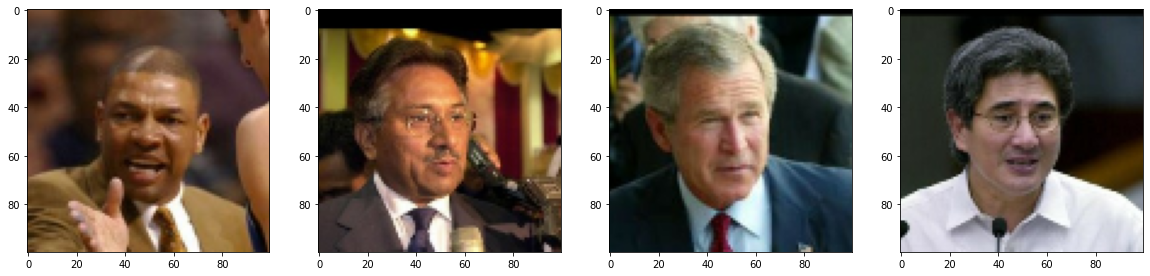

In [15]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample))

In [16]:
# Reload the dataset 
ds = dataset
# Cache the dataset for that batch 
ds = ds.cache()
# Shuffle it up 
ds = ds.shuffle(len(os.listdir(POS_PATH)))
# Batch into 128 images per sample
batch_size= 32
ds = ds.batch(batch_size)
# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(int(batch_size/2))  ## 전처리와 훈련 스텝의 모델 실행을 오버랩(동시에 작동)

In [17]:
ds.as_numpy_iterator().next().shape

(32, 100, 100, 3)

# 3. Build Neural Network

### 3.1 Import Modelling Components

In [18]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### 3.2 Build Generator

In [19]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 25x25x128
    # Beginnings of a generated image
    model.add(Dense(25*25*batch_size, input_dim=batch_size))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((25,25,batch_size)))
    
    # Upsampling block 1 
    model.add(UpSampling2D()) ## 2D 입력을 위해 업샘플링
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2)) ## LeakyReLU(alpha=0.2) : alpha : 음의 기울기 계수, 기본값은 0.3
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))  # Conv2D(filters, kernel_size, stides=(1,1))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(3, 4, padding='same', activation='sigmoid'))
    
    return model

In [20]:
generator = build_generator()

In [21]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20000)             660000    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 20000)             0         
                                                                 
 reshape (Reshape)           (None, 25, 25, 32)        0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 128)       102528    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 128)       0         
                                                        

2022-07-15 15:26:32.654543: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-07-15 15:26:32.793886: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-07-15 15:26:33.957006: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 2s 2s/step


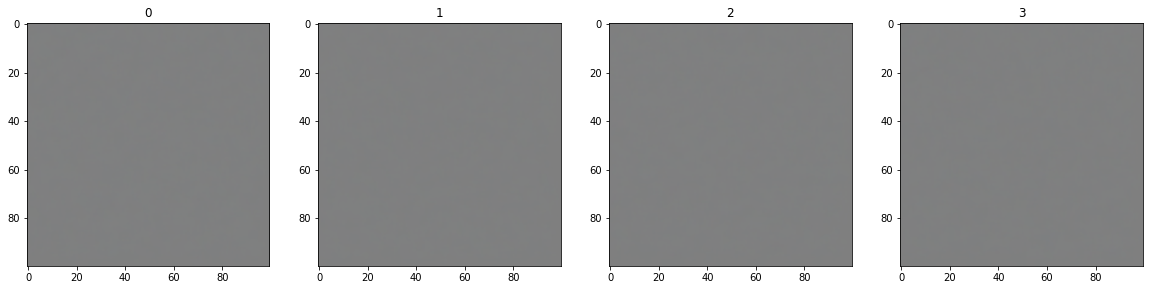

In [22]:
# Generate new fashion
img = generator.predict(np.random.randn(4,batch_size,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

### 3.3 Build Discriminator

In [23]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (100,100,3)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [24]:
discriminator = build_discriminator()

In [25]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 dropout (Dropout)           (None, 96, 96, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 92, 92, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 92, 92, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 92, 92, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 88, 88, 128)      

In [26]:
img = generator.predict(np.random.randn(4,batch_size,1))

1/1 [==============================] - 0s 19ms/step


In [27]:
img.shape

(4, 100, 100, 3)

In [28]:
discriminator.predict(img)

1/1 [==============================] - 0s 146ms/step


array([[0.50086045],
       [0.5008232 ],
       [0.5009072 ],
       [0.5008761 ]], dtype=float32)

# 4. Construct Training Loop

### 4.1 Setup Losses and Optimizers

In [29]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy

In [30]:
g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
## when training generator and discriminator at the same time, it is so challenging to keep symmetric in time and balance.
## for balancing 2 models, d_optimizer's learning rate is much smaller than g_opt.
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### 4.2 Build Subclassed Model

In [31]:
# Importing the base model class to subclass our training step 
from tensorflow.keras.models import Model

In [32]:
class FacialGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((batch_size, batch_size, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((batch_size,batch_size,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [33]:
# Create instance of subclassed model
facegan = FacialGAN(generator, discriminator)

In [34]:
# Compile the model
facegan.compile(g_opt, d_opt, g_loss, d_loss)

### 4.3 Build Callback

In [35]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [36]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=batch_size):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('fake_face', f'generated_img_{epoch}_{i}.png'))

### 4.3 Train 

In [37]:
# Recommend 2000 epochs
hist = facegan.fit(ds, epochs=2000, callbacks=[ModelMonitor()])

Epoch 1/20


2022-07-15 15:26:51.679337: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.71GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-15 15:26:51.679383: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.71GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


414/414 [==============================] - 85s 197ms/step - d_loss: 0.5366 - g_loss: 0.4897
Epoch 2/20
414/414 [==============================] - 81s 196ms/step - d_loss: 0.5690 - g_loss: 0.1869
Epoch 3/20
414/414 [==============================] - 83s 200ms/step - d_loss: 0.7126 - g_loss: 0.4048
Epoch 4/20
414/414 [==============================] - 84s 204ms/step - d_loss: 0.3651 - g_loss: 0.0398
Epoch 5/20
414/414 [==============================] - 85s 205ms/step - d_loss: 0.4323 - g_loss: 0.0166
Epoch 6/20
414/414 [==============================] - 85s 205ms/step - d_loss: 0.3500 - g_loss: 0.0037
Epoch 7/20
414/414 [==============================] - 86s 207ms/step - d_loss: 0.3261 - g_loss: 0.0033
Epoch 8/20
414/414 [==============================] - 91s 219ms/step - d_loss: 0.4747 - g_loss: 0.0423
Epoch 9/20
414/414 [==============================] - 88s 212ms/step - d_loss: 0.2779 - g_loss: 0.0015
Epoch 10/20
414/414 [==============================] - 87s 211ms/step - d_loss: 0.27

In [38]:
generator.save('archive/generator_facemodel_joseb.h5') ## generator model save(discriminator model save not needed )

### 4.4 Review Performance

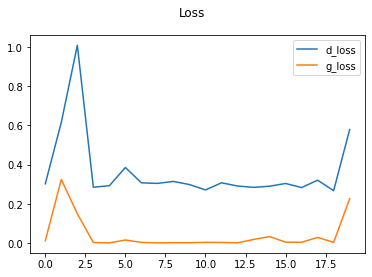

In [39]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# 5. Test Out the Generator

### 5.1 Generate Images

In [40]:
generator.load_weights(os.path.join('archive', 'generator_facemodel_joseb.h5'))

In [42]:
imgs = generator.predict(tf.random.normal((16, batch_size, 1)))

1/1 [==============================] - 0s 217ms/step


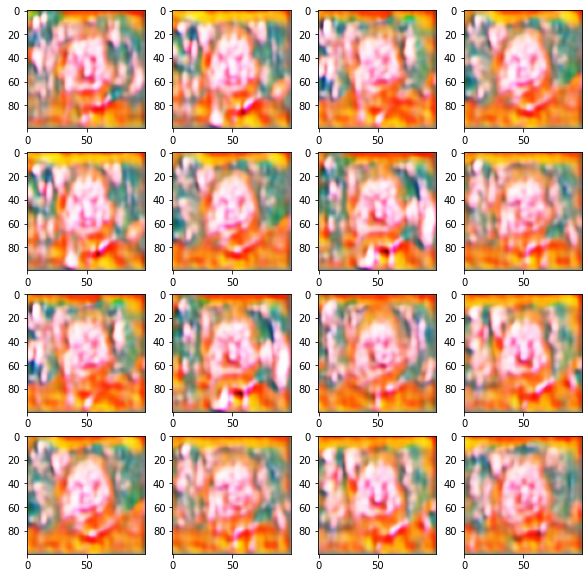

In [43]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

### 5.2 Save the Model

In [45]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')